In [4]:
#Q1

In [7]:
import pandas as pd

users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|')
 
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print('mean_age_per_occupation:\n', mean_age_per_occupation)

users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)

print('male_ratio:\n', male_ratio)

min_max_age = users.groupby('occupation')['age'].agg([min, max])

print('min_max_age:\n', min_max_age)

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print('mean_age_per_occupation_sex:\n', mean_age_per_occupation_sex)

gender_counts = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
total_counts = users.groupby('occupation')['gender'].count()
gender_percentage = (gender_counts.div(total_counts, axis=0) * 100).rename(columns={'F': 'Female%', 'M': 'Male%'})

print('gender_percentage:\n', gender_percentage)

mean_age_per_occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
male_ratio:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketin

In [ ]:
#Q2

In [8]:
import pandas as pd

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

goals = euro12['Goals']

number_of_teams = len(euro12['Team'].unique())

print('number_of_teams:', number_of_teams)

number_of_columns = euro12.shape[1]

print('number_of_columns:', number_of_columns)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print('discipline:\n', discipline)

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

print('discipline_sorted:\n', discipline_sorted)

average_yellow_cards = discipline['Yellow Cards'].mean()

print('average_yellow_cards:\n', average_yellow_cards)

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

print('teams_more_than_6_goals:\n', teams_more_than_6_goals)

teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]

print('teams_start_with_G:\n', teams_start_with_g)

first_7_columns = euro12.iloc[:, :7]

print('first_7_columns:\n', first_7_columns)

columns_except_last_3 = euro12.iloc[:, :-3]

print('columns_except_last_3:\n', columns_except_last_3)

shooting_accuracy_specific = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print('shooting_accuracy_specific:\n', shooting_accuracy_specific)


number_of_teams: 16
number_of_columns: 35
discipline:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0
discipline_sorted:
                    Team  Yellow Cards  Red Cards
6                Greece             9      

In [ ]:
#Q3

In [9]:
import pandas as pd
import numpy as np

np.random.seed(0)
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))

df = pd.DataFrame({'bedrs': s1, 'bathrs': s2, 'price_sqr_meter': s3})

bigcolumn = pd.concat([s1, s2, s3], ignore_index=True).to_frame('bigcolumn')

print(df)
print(bigcolumn)

    bedrs  bathrs  price_sqr_meter
0       1       2            15021
1       4       3            11134
2       2       1            26409
3       1       1            19680
4       4       3            27340
..    ...     ...              ...
95      1       2            28161
96      3       2            29745
97      4       1            18338
98      2       1            24676
99      1       1            12562

[100 rows x 3 columns]
     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


In [ ]:
#Q4

In [12]:
import pandas as pd
from datetime import datetime

data = pd.read_csv('./wind.txt', delim_whitespace=True)

date_series = data['Yr'].astype(str) + '-' + data['Mo'].astype(str) + '-' + data['Dy'].astype(str)

data['Yr_Mo_Dy'] = pd.to_datetime(date_series, format='%y-%m-%d', errors='coerce')

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(lambda x: x if x.year < 2000 else datetime(x.year - 100, x.month, x.day))

# Set the datetime as the index
data.set_index('Yr_Mo_Dy', inplace=True)

missing_values = data.isnull().sum()
print('missing_values:\n', missing_values)

non_missing_values = data.notnull().sum().sum()
print('non_missing_values:\n', non_missing_values)

mean_windspeed = data.mean().mean()
print('mean_windspeed:\n', mean_windspeed)

loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print('loc_stats:\n', loc_stats)

day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print('day_stats:\n', day_stats)

january_winds = data[data.index.month == 1].mean()
print('january_winds:\n', january_winds)

yearly_stats = data.resample('A').mean()
print('yearly_stats:\n', yearly_stats)

monthly_stats = data.resample('M').mean()
print('monthly_stats:\n', monthly_stats)

weekly_stats = data.resample('W').mean()
print('weekly_stats:\n', weekly_stats)

first_52_weeks_stats = data[:'1962'].resample('W').agg(['min', 'max', 'mean', 'std'])
print('first_52_weeks_stats:\n', first_52_weeks_stats)

missing_values:
 Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
non_missing_values:
 98579
mean_windspeed:
 14.299199599246569
loc_stats:
        min    max       mean       std
Yr   61.00  78.00  69.500304  5.188131
Mo    1.00  12.00   6.523274  3.448871
Dy    1.00  31.00  15.728628  8.800335
RPT   0.67  35.80  12.362987  5.618413
VAL   0.21  33.37  10.644314  5.267356
ROS   1.50  33.84  11.660526  5.008450
KIL   0.00  28.46   6.306468  3.605811
SHA   0.13  37.54  10.455834  4.936125
BIR   0.00  26.16   7.092254  3.968683
DUB   0.00  30.37   9.797343  4.977555
CLA   0.00  31.08   8.495053  4.499449
MUL   0.00  25.88   8.493590  4.166872
CLO   0.04  28.21   8.707332  4.503954
BEL   0.13  42.38  13.121007  5.835037
MAL   0.67  42.54  15.599079  6.699794
day_stats:
              min   max       mean        std
Yr_Mo_Dy                                    
1961-01-01  1.00  61.0  14.728571 

In [ ]:
#Q5

In [13]:
import pandas as pd


chipo_data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')


print("First 10 entries:\n", chipo_data.head(10))


observations = chipo_data.shape[0]
columns = chipo_data.shape[1]


print("Number of observations:", observations)
print("Number of columns:", columns)


print("Column names:", chipo_data.columns.tolist())


print("Index details:", chipo_data.index)


item_order_freq = chipo_data['item_name'].value_counts()
most_ordered_item_name = item_order_freq.idxmax()
most_ordered_item_qty = item_order_freq.max()
print("Most ordered item:", most_ordered_item_name)
print("Ordered", most_ordered_item_qty, "times")


if 'choice_description' in chipo_data.columns:
    choice_freq = chipo_data['choice_description'].value_counts()
    top_choice_description = choice_freq.idxmax()
    top_choice_qty = choice_freq.max()
    print("Most ordered choice:", top_choice_description)
    print("Ordered", top_choice_qty, "times")


chipo_data['item_price'] = chipo_data['item_price'].str.replace('$', '').astype(float)
print("Data type of item_price:", chipo_data['item_price'].dtype)


chipo_data['total_price'] = chipo_data['item_price'] * chipo_data['quantity']
total_revenue = chipo_data['total_price'].sum()
print("Total revenue: ${:.2f}".format(total_revenue))


total_orders = chipo_data['order_id'].nunique()
print("Total number of orders:", total_orders)


average_revenue = total_revenue / total_orders
print("Average revenue per order: ${:.2f}".format(average_revenue))


unique_items_sold = chipo_data['item_name'].nunique()
print("Number of different items sold:", unique_items_sold)


First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

/var/folders/d6/b9483z1x4kqdm7d2htfh2ytw0000gn/T/ipykernel_2424/1393665523.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_data['item_price'] = chipo_data['item_price'].str.replace('$', '').astype(float)


In [ ]:
#Q6

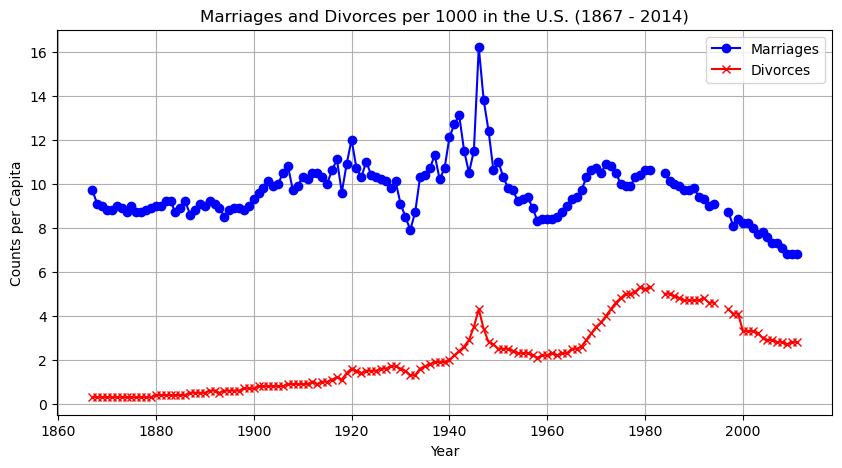

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./us-marriages-divorces-1867-2014.csv')

plt.figure(figsize=(10, 5))
plt.plot('Year', 'Marriages_per_1000', data=data, label='Marriages', marker='o', color='blue')
plt.plot('Year', 'Divorces_per_1000', data=data, label='Divorces', marker='x', color='red')

plt.title('Marriages and Divorces per 1000 in the U.S. (1867 - 2014)')
plt.xlabel('Year')
plt.ylabel('Counts per Capita')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Q7

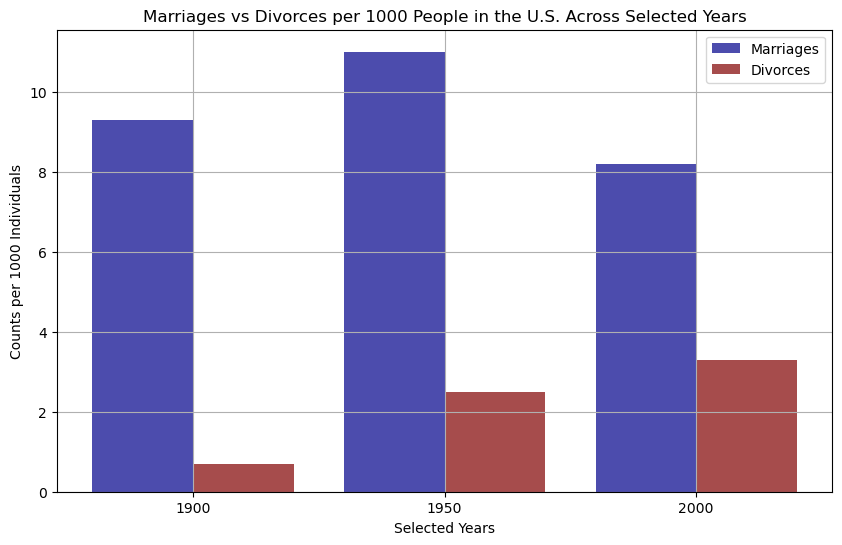

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = './us-marriages-divorces-1867-2014.csv'
data_frame = pd.read_csv(data_file)

target_years = [1900, 1950, 2000]
selected_data = data_frame[data_frame['Year'].isin(target_years)]

index_positions = list(range(len(target_years)))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

marriage_bars = ax.bar([i - bar_width/2 for i in index_positions], selected_data['Marriages_per_1000'], 
                       bar_width, alpha=0.7, color='darkblue', label='Marriages')
divorce_bars = ax.bar([i + bar_width/2 for i in index_positions], selected_data['Divorces_per_1000'], 
                      bar_width, alpha=0.7, color='maroon', label='Divorces')

ax.set_xlabel('Selected Years')
ax.set_ylabel('Counts per 1000 Individuals')
ax.set_title('Marriages vs Divorces per 1000 People in the U.S. Across Selected Years')
ax.set_xticks(index_positions)
ax.set_xticklabels(target_years)

ax.legend()
ax.grid(True)

plt.show()


In [ ]:
#Q8

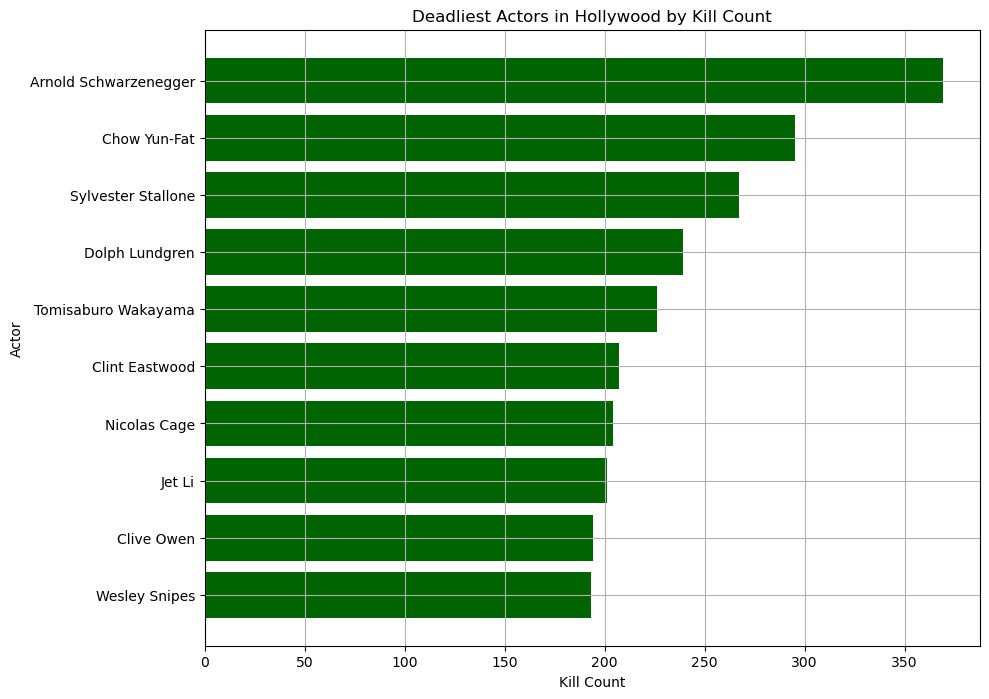

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


actor_data = pd.read_csv('./actor_kill_counts.csv')

sorted_data = actor_data.sort_values('Count')


plt.figure(figsize=(10, 8))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='darkgreen')


plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood by Kill Count')
plt.grid(True)

plt.show()


#Q9

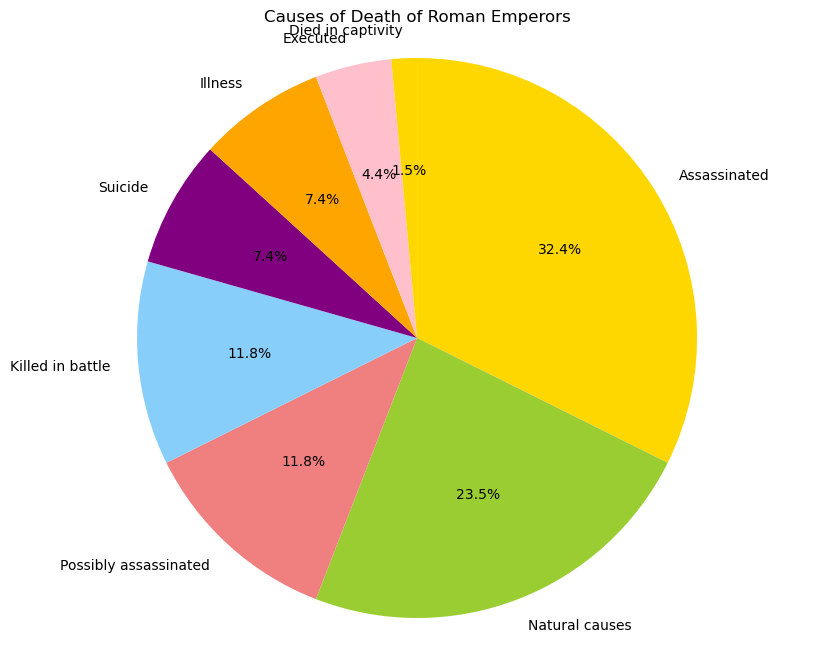

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


emperor_data = pd.read_csv('./roman-emperor-reigns.csv')


cause_counts = emperor_data['Cause_of_Death'].value_counts()


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange', 'pink']


plt.figure(figsize=(10, 8))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('Causes of Death of Roman Emperors')
plt.axis('equal')
plt.show()


In [ ]:
#Q10

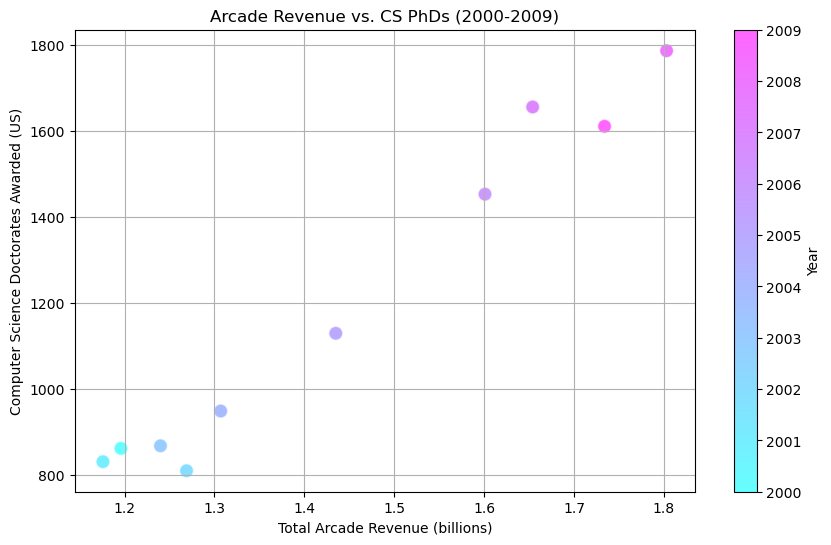

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./arcade-revenue-vs-cs-doctorates.csv')


plt.figure(figsize=(10, 6))


cmap = plt.get_cmap('cool')

scatter_plot = plt.scatter('Total Arcade Revenue (billions)', 'Computer Science Doctorates Awarded (US)', 
                           c='Year', cmap=cmap, s=100, alpha=0.6, edgecolors='w', linewidth=1, data=data)


plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. CS PhDs (2000-2009)')


color_bar = plt.colorbar(scatter_plot)
color_bar.set_label('Year')


plt.grid(True)


plt.show()
